# **Customer Lifetime Value (CLV) Forecasting**

### **1. Problem Statement**
An auto insurance company in the USA is experiencing challenges in retaining its customers in a highly competitive market. The company recognizes that the insurance premium is not the sole factor influencing customer decisions. To address this issue, the company aims to leverage Customer Lifetime Value (CLV) as a key metric. CLV represents the total value a customer brings to the company over their entire relationship. By effectively utilizing CLV, the company seeks to retain valuable customers, increase revenue from less valuable customers, and enhance the overall customer experience.

### **2. Objective**
The primary objective of this project is to develop a predictive model for Customer Lifetime Value (CLV) and find the most significant features that will enable the auto insurance company to:

- Identify and retain high-value customers.
- Design targeted promotional offers for loyal customers.
- Improve customer acquisition strategies.
- Prevent customer churn.
- Optimize marketing budget allocation.
- Measure the performance of advertising campaigns in greater detail.

### **3. Domain Analysis for CLV in Auto Insurance**
1. Understanding CLV in Auto Insurance
- Definition: CLV is the total revenue a customer generates over their entire relationship with the company.
- Importance: Helps identify high-value customers, optimize marketing spend, and improve customer retention.
2. Factors Influencing CLV
- Customer Retention: Longer retention increases CLV. Strategies to improve retention include personalized offers, loyalty programs, and excellent customer service.
- Customer Acquisition Costs (CAC): Balancing CAC with CLV is crucial. High CAC can reduce overall profitability.
- Policy Renewal Rates: Frequent renewals contribute to higher CLV. Encouraging renewals through discounts and incentives can be effective.
- Cross-Selling and Up-Selling: Offering additional products or higher-tier policies can increase the value derived from each customer.


### **4. Import Libraries**  

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as statsmodels
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.tsa.api as smt
from scipy.stats import chi2_contingency
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

### **5.Data Collection and feature analysis**  

In [2]:
df= pd.read_csv("AutoInsurance.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
7952,UY81122,Oregon,4167.994667,No,Basic,College,2/2/2011,Unemployed,F,0,...,98,3,8,Personal Auto,Personal L3,Offer1,Agent,433.959806,Four-Door Car,Medsize
8709,SX87181,California,4916.479717,No,Basic,Bachelor,6/2/2011,Unemployed,F,0,...,61,0,7,Personal Auto,Personal L3,Offer1,Agent,312.000000,Two-Door Car,Large
1968,PF40592,Washington,4942.630606,No,Basic,College,8/1/2011,Medical Leave,F,23285,...,22,0,7,Personal Auto,Personal L2,Offer2,Web,118.446235,Two-Door Car,Medsize
3351,WB43408,Oregon,4598.235733,No,Basic,College,1/15/11,Employed,F,51523,...,20,0,1,Personal Auto,Personal L3,Offer4,Branch,738.840818,SUV,Medsize
4923,CU69816,California,2721.749756,No,Basic,Bachelor,2/22/11,Medical Leave,M,22885,...,46,0,1,Corporate Auto,Corporate L2,Offer2,Web,386.245297,Four-Door Car,Medsize
4106,GW52309,Nevada,9118.148093,No,Basic,High School or Below,8/1/2011,Employed,F,56446,...,8,0,3,Personal Auto,Personal L3,Offer1,Branch,547.200000,SUV,Medsize
660,EL93539,California,5757.442258,Yes,Basic,Master,1/31/11,Employed,M,88997,...,71,0,3,Special Auto,Special L3,Offer2,Branch,174.041566,Four-Door Car,Small
8694,YR30159,California,20936.331050,No,Basic,College,6/2/2011,Employed,M,20309,...,12,0,2,Personal Auto,Personal L3,Offer1,Agent,1579.854155,Luxury Car,Medsize
3534,DX65548,Arizona,4834.710493,Yes,Basic,College,1/31/11,Employed,F,38713,...,69,4,6,Personal Auto,Personal L1,Offer2,Call Center,316.800000,Four-Door Car,Medsize
8499,OE75629,California,2798.834343,No,Basic,College,1/29/11,Employed,M,48675,...,62,1,1,Corporate Auto,Corporate L3,Offer1,Web,340.800000,Four-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

In [6]:
df.value_counts()

Customer  State       Customer Lifetime Value  Response  Coverage  Education             Effective To Date  EmploymentStatus  Gender  Income  Location Code  Marital Status  Monthly Premium Auto  Months Since Last Claim  Months Since Policy Inception  Number of Open Complaints  Number of Policies  Policy Type     Policy        Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size
AA10041   California  7901.744238              No        Basic     High School or Below  2/2/2011           Unemployed        M       0       Suburban       Single          113                   35                       83                             0                          5                   Personal Auto   Personal L3   Offer1            Call Center    1258.327804         SUV            Medsize         1
RL28880   Nevada      7553.225007              No        Basic     Bachelor              12/2/2011          Employed          F       69959   Suburban       Divorced        63  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
column_names = list(df.columns)
print(column_names)

['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']


In [9]:
col_name=pd.DataFrame(column_names)
col_name

,0
0,Customer
1,State
2,Customer Lifetime Value
3,Response
4,Coverage
5,Education
6,Effective To Date
7,EmploymentStatus
8,Gender
9,Income


**0. Customer:** Unique identifier for each customer. Useful for tracking individual customer data.

**1. State:** The state where the customer resides. Geographic location can influence insurance rates and customer behavior.

**2. Customer Lifetime Value (CLV):** The total worth of a customer over the whole period of their relationship. **This is target variable.**

**3. Response:** Whether the customer responded to marketing efforts. Indicates engagement and can affect retention.

**4. Coverage:** Type of insurance coverage (e.g., basic, extended). Different coverage levels can impact the premium and claims.

**5. Education:** Customer’s education level. Higher education levels might correlate with lower risk and different purchasing behaviors.

**6. Effective To Date:** The date when the policy becomes effective. Can be used to calculate policy age.

**7. Employment Status:** Employment status of the customer. Employment can affect income and risk levels.

**8. Gender:** Gender of the customer. Gender can influence driving behavior and risk assessment.

**9. Income:** Annual income of the customer. Higher income might correlate with higher coverage levels and lower risk.

**10. Location Code:** Code representing the type of area (urban, suburban, rural). Different areas have different risk levels.

**11. Marital Status:** Marital status of the customer. Married individuals might have different risk profiles compared to single individuals.

**12. Monthly Premium Auto:** Monthly premium paid by the customer. Directly impacts revenue and can indicate the level of coverage.

**13. Months Since Last Claim:** Time since the last claim was made. Indicates risk and claim frequency.

**14. Months Since Policy Inception:** Duration since the policy started. Longer durations might indicate loyalty.

**15. Number of Open Complaints:** Number of unresolved complaints. High numbers can indicate dissatisfaction and risk of churn.

**16. Number of Policies:** Total number of policies the customer holds. More policies might indicate higher value and loyalty.

**17. Policy Type:** Type of policy (e.g., personal, commercial). Different types have different risk and value profiles.

**18. Policy:** Specific policy details. Can provide insights into coverage and risk.

**19. Renew Offer Type:** Type of renewal offer made to the customer. Can influence retention and CLV.

**20. Sales Channel:** Channel through which the policy was sold (e.g., online, agent). Different channels might have different customer profiles.

**21. Total Claim Amount:** Total amount claimed by the customer. High claim amounts can indicate higher risk.

**22. Vehicle Class:** Class of the vehicle (e.g., economy, luxury). Different classes have different risk and premium levels.

**23. Vehicle Size:** Size of the vehicle (e.g., small, medium, large). Size can influence risk and premium.

### **6. Data Cleaning**

In [10]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Check the numerical_cols

In [12]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [13]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [14]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)


summary

In [15]:

numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [16]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [17]:
# Check for any duplicates
df.duplicated().sum()

0

### **7. Exploratory data analysis**

### Numerical Variables

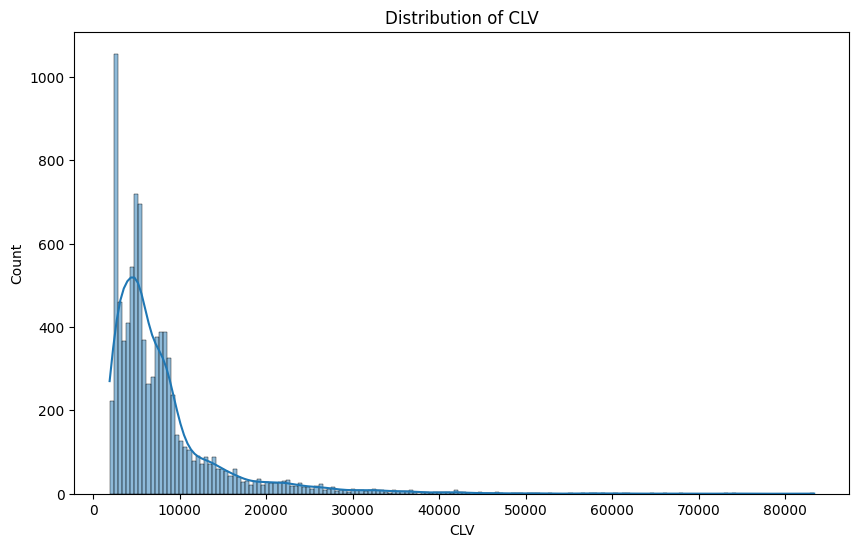

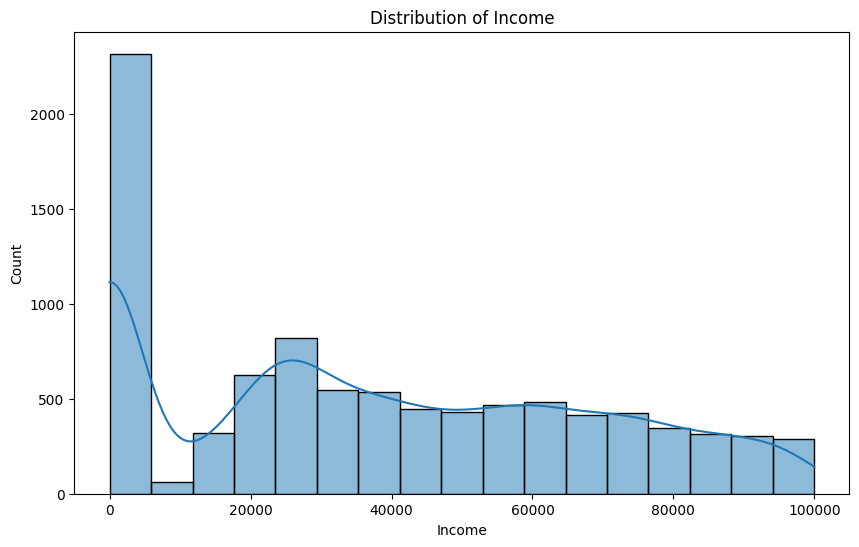

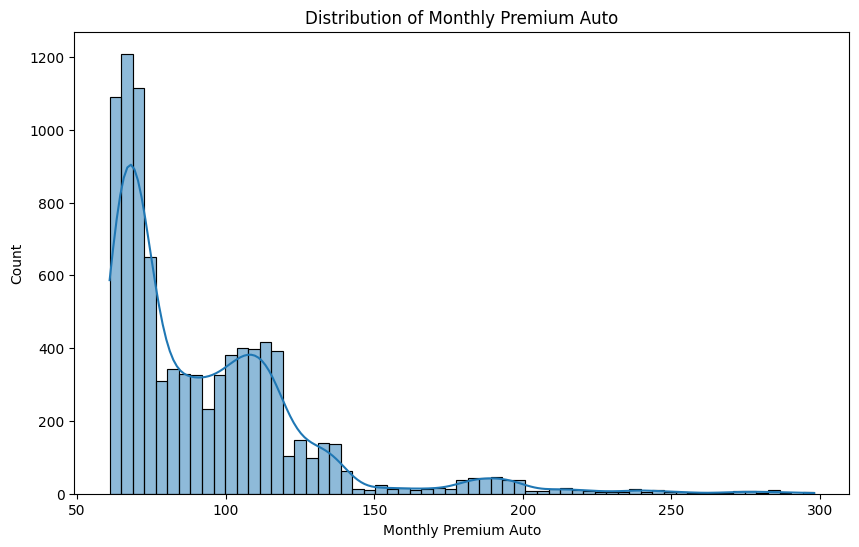

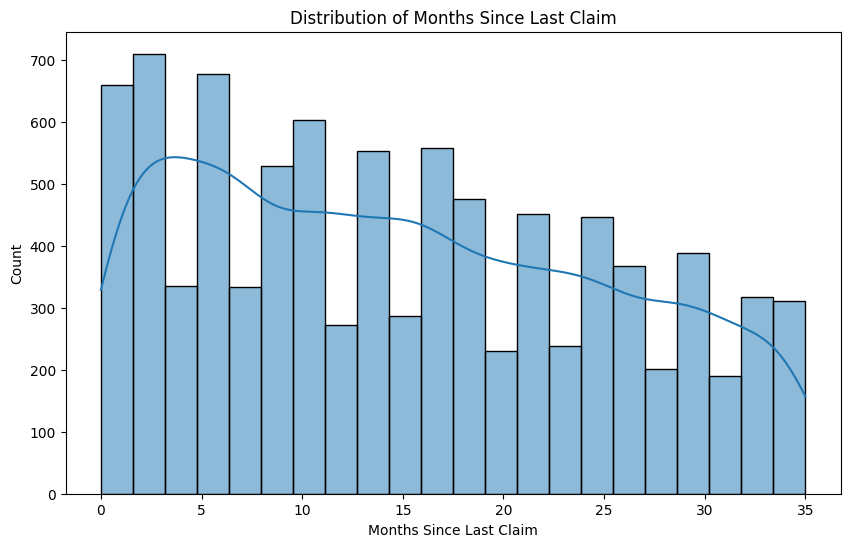

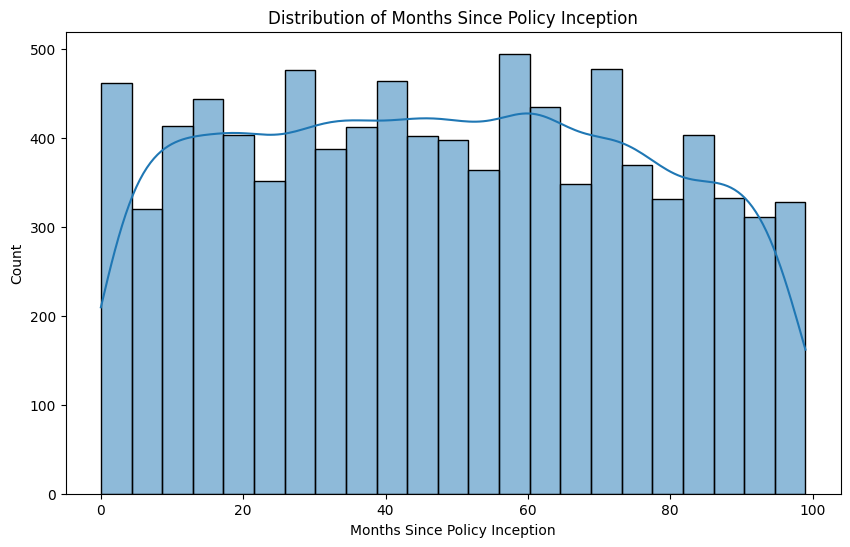

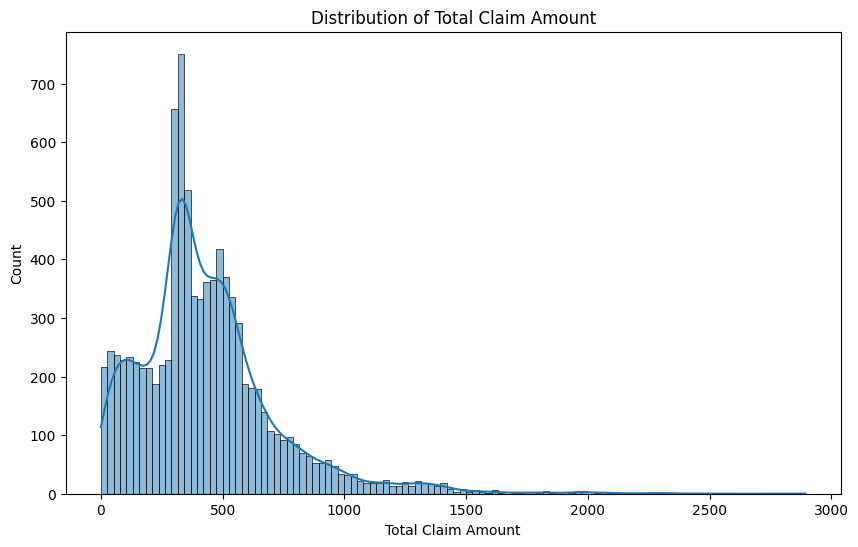

In [18]:
for column in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    #plt.ylabel('Frequency')
    plt.show()

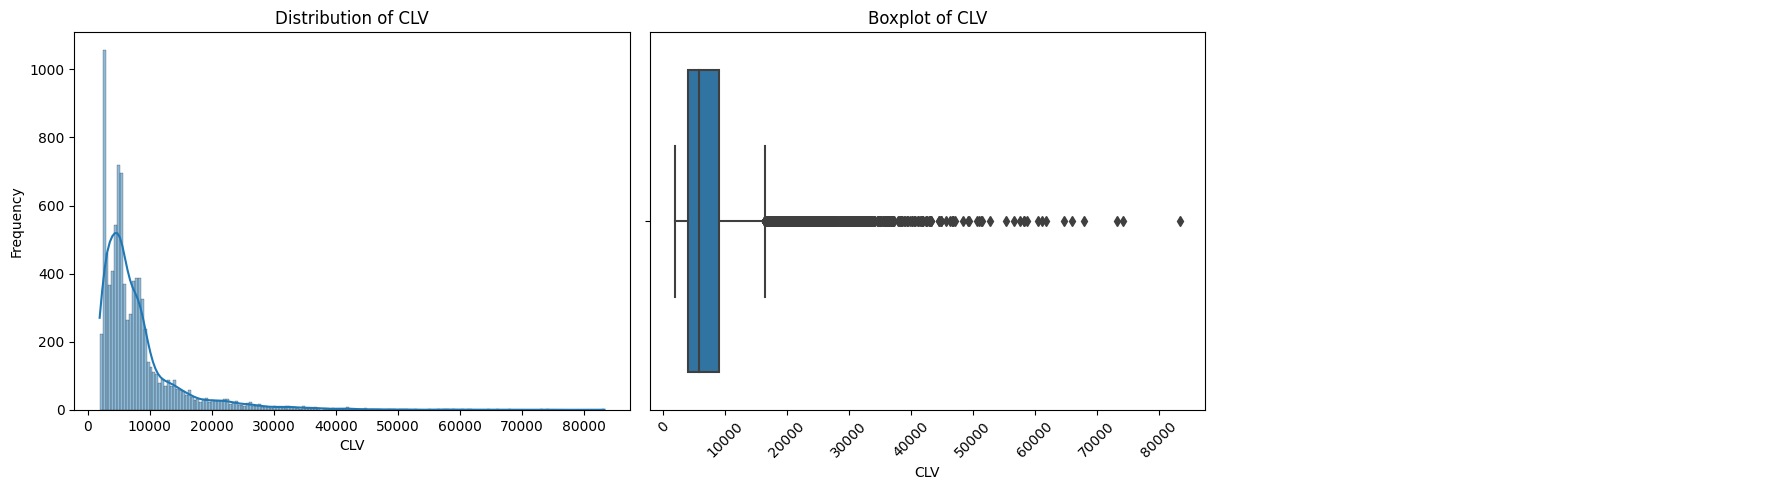

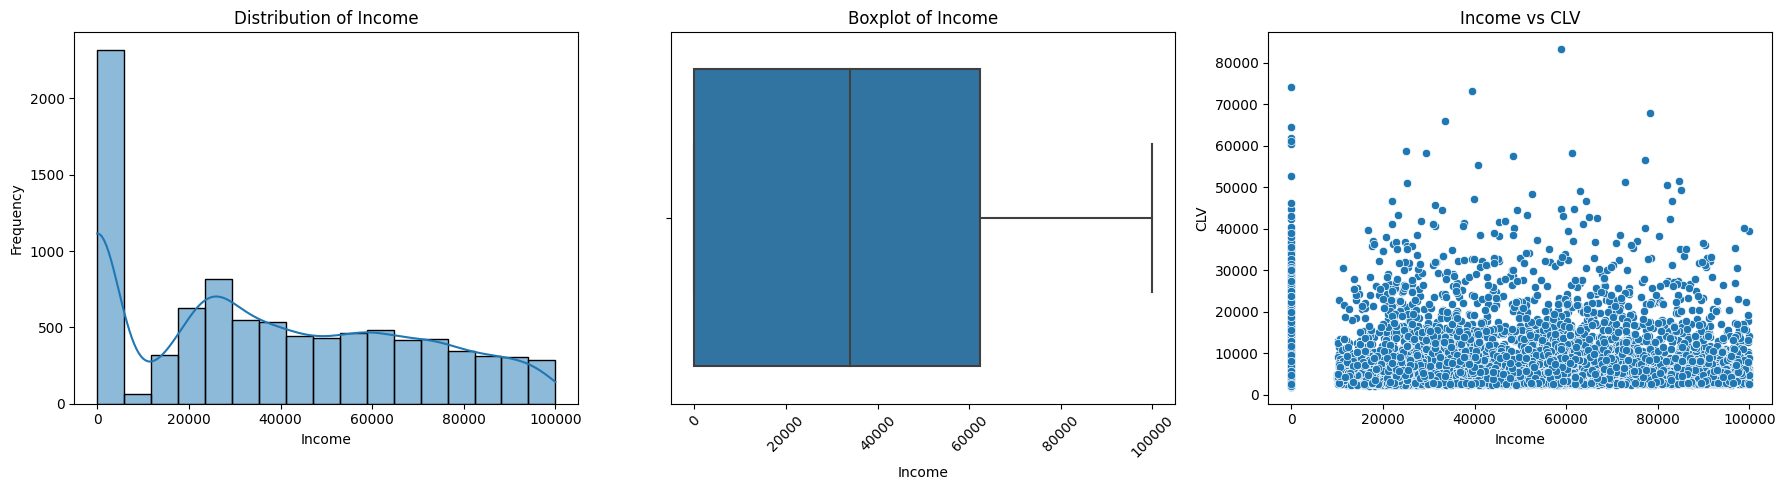

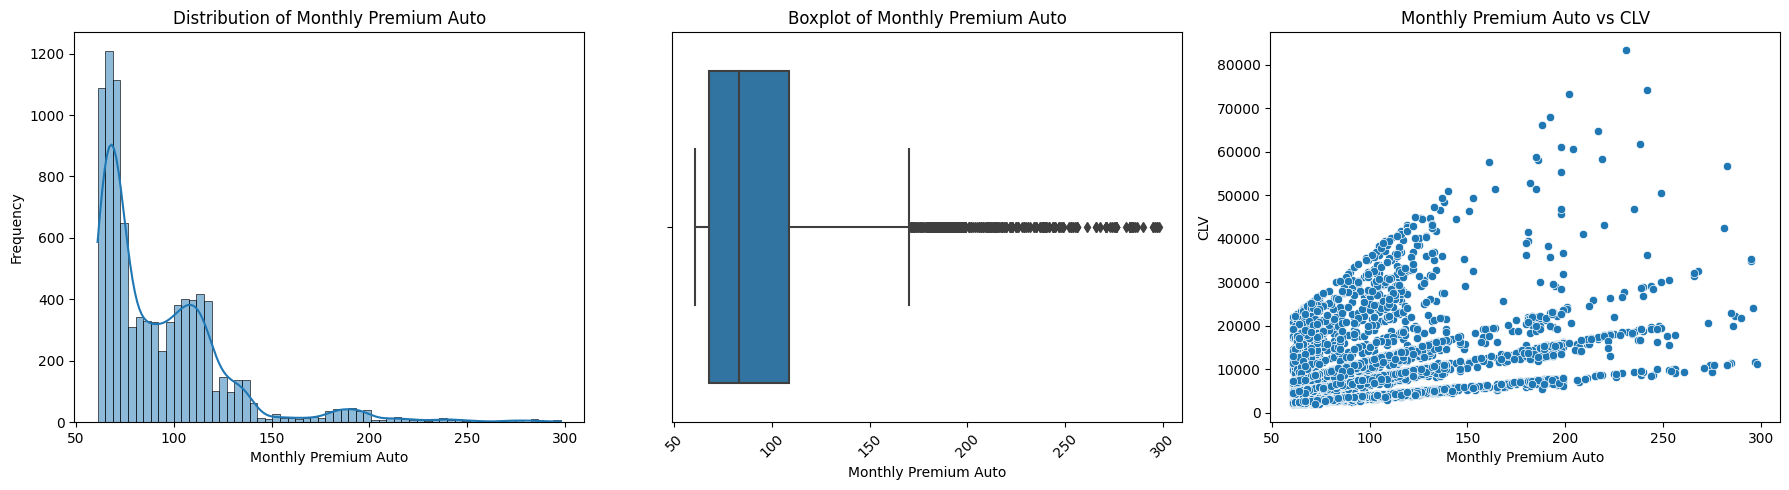

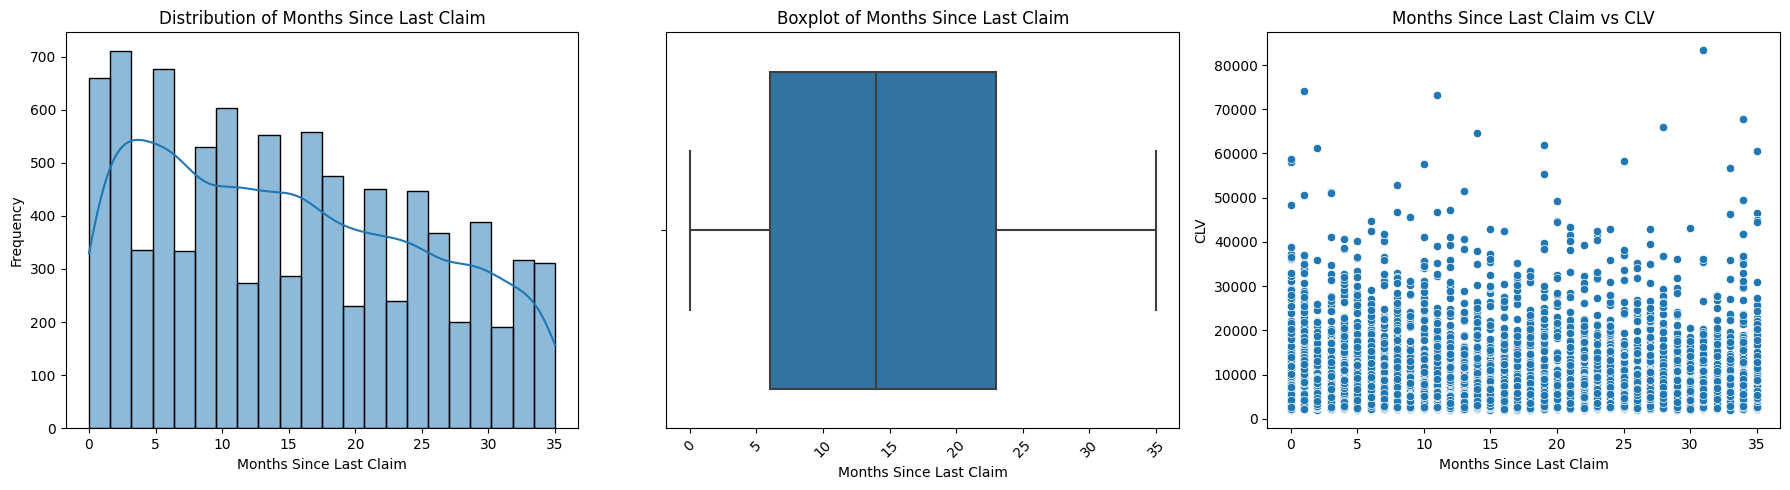

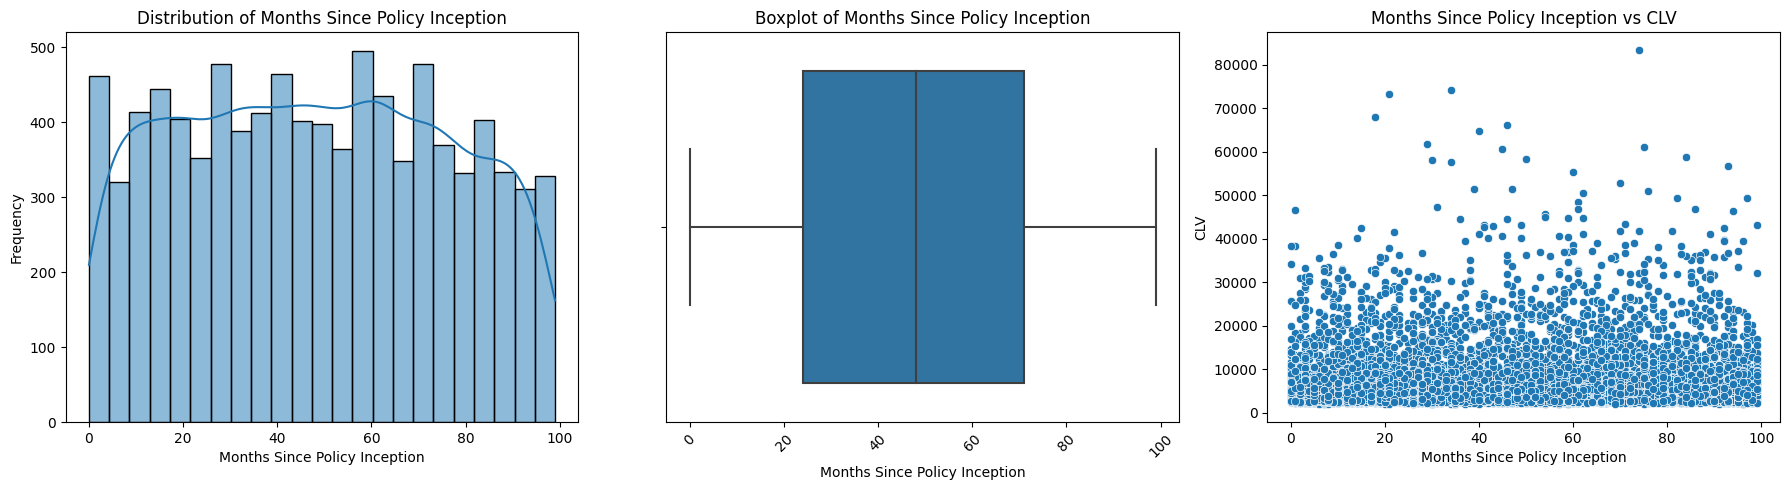

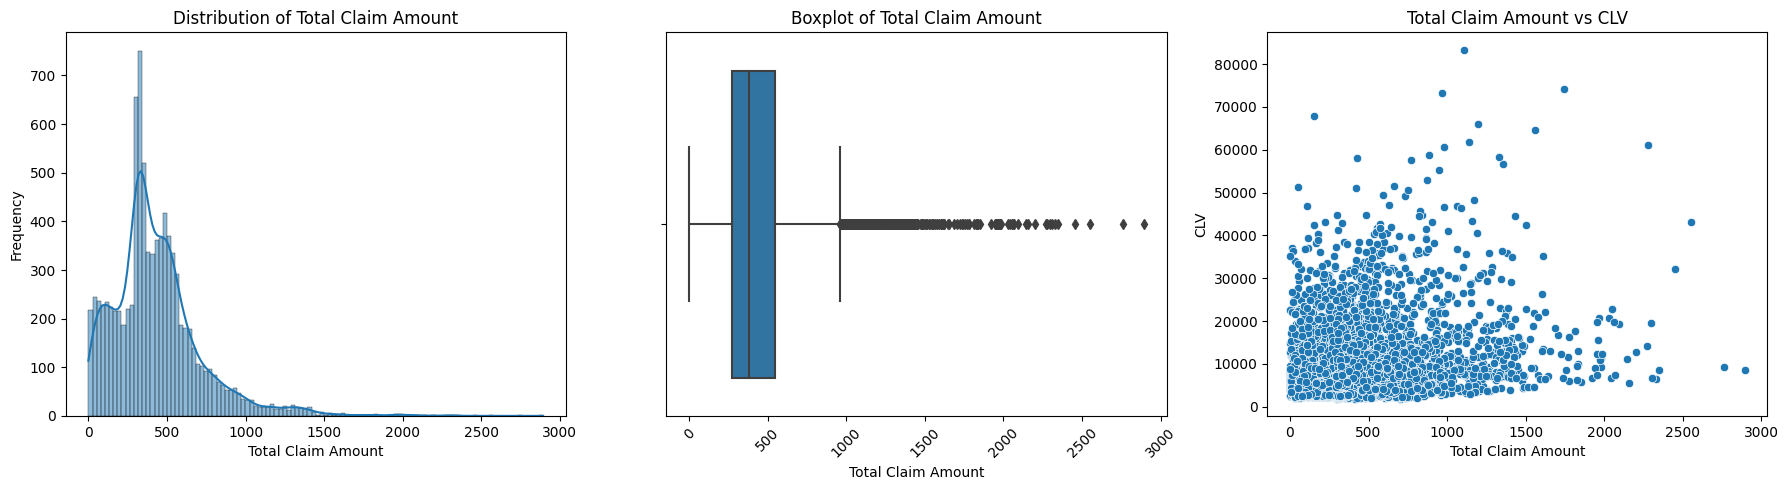

In [19]:
# Loop through each numerical column and plot
for column in numerical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Univariate Analysis - Distribution Plot
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    # Horizontal Boxplot
    sns.boxplot(x=df[column], ax=axes[1], orient='h')
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Bivariate Analysis - Scatter Plot with CLV
    if column != 'CLV': #avoid CLV plot, its target column
        sns.scatterplot(x=df[column], y=df['CLV'], ax=axes[2])
        axes[2].set_title(f'{column} vs CLV')
        axes[2].set_xlabel(column)
        axes[2].set_ylabel('CLV')
    else:
        axes[2].axis('off')  # Hide the third plot if the column is CLV
    
    plt.tight_layout()
    plt.show()

- There is a linear relationship between CLV and Total Claim Amount

- The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

<Figure size 1000x600 with 0 Axes>

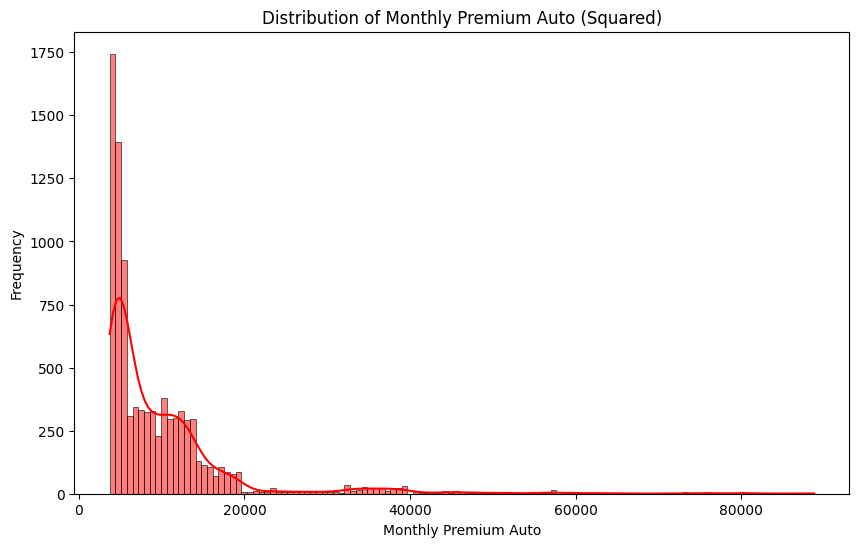

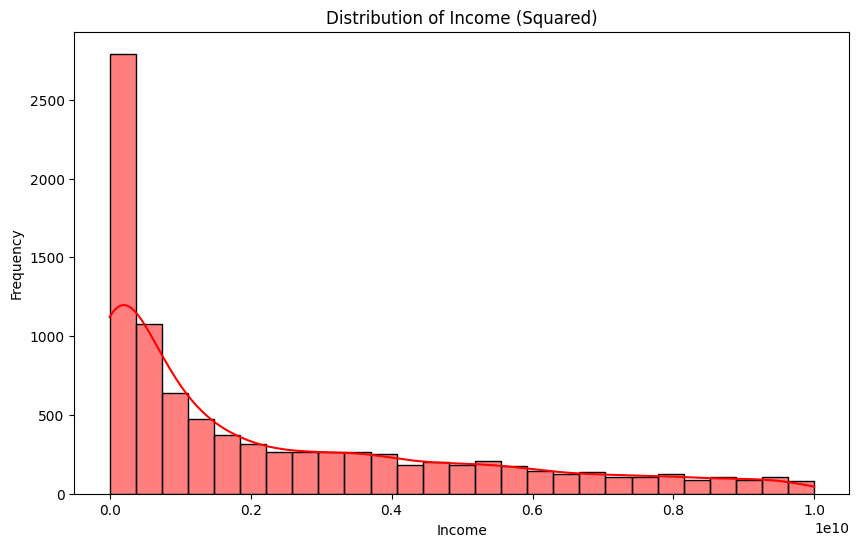

In [20]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through the specified columns and plot
for column in ['Monthly Premium Auto', 'Income']:
    plt.figure(figsize=(10, 6))
    sns.histplot(np.square(df[column]), kde=True, color='red')
    plt.title(f'Distribution of {column} (Squared)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

As we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

### Categorical variables

In [21]:
# Select the categorical variables
cat_cols = df.select_dtypes(include="object")

In [22]:
# define new varaible for  earlier dropped feature
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [23]:
# add the categorical variables and no col
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [24]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [25]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [26]:
cat_cols.columns


Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [27]:
# print the unique and distinct values in the categorical variables
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("******************************************")

Unique values in Customer is 9134
Customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
******************************************
Unique values in State is 5
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
******************************************
Unique values in Response is 2
Response
No     7826
Yes    1308
Name: count, dtype: int64
******************************************
Unique values in Coverage is 3
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
******************************************
Unique values in Education is 5
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
***************************

- unique values: Knowing the number of unique values helps you understand the diversity of categories in each column. It can also help identify columns with too many unique values, which might need special handling.

- value_counts: This function returns the count of each unique value in a column. It can be used to identify the most common or rare categories.

Skipping plot for Customer column as it's a categorical variable with too many unique values


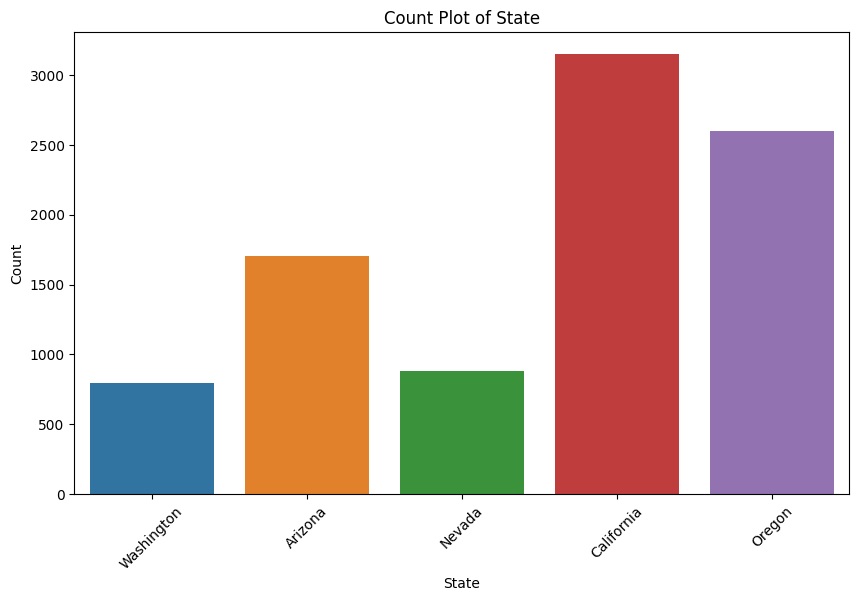

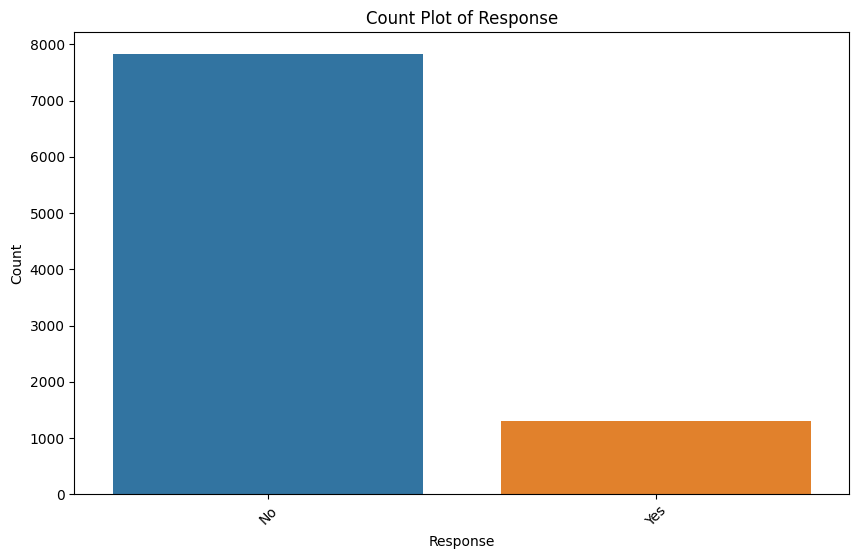

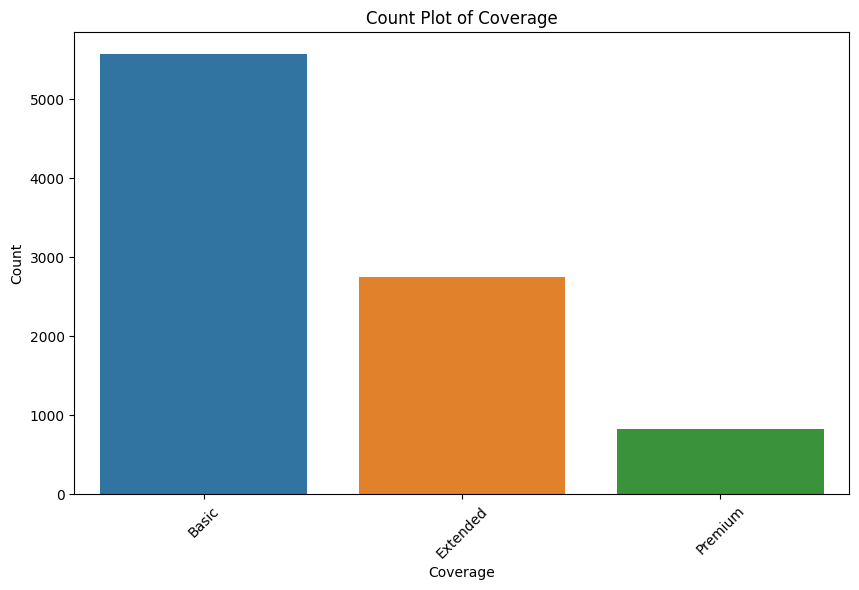

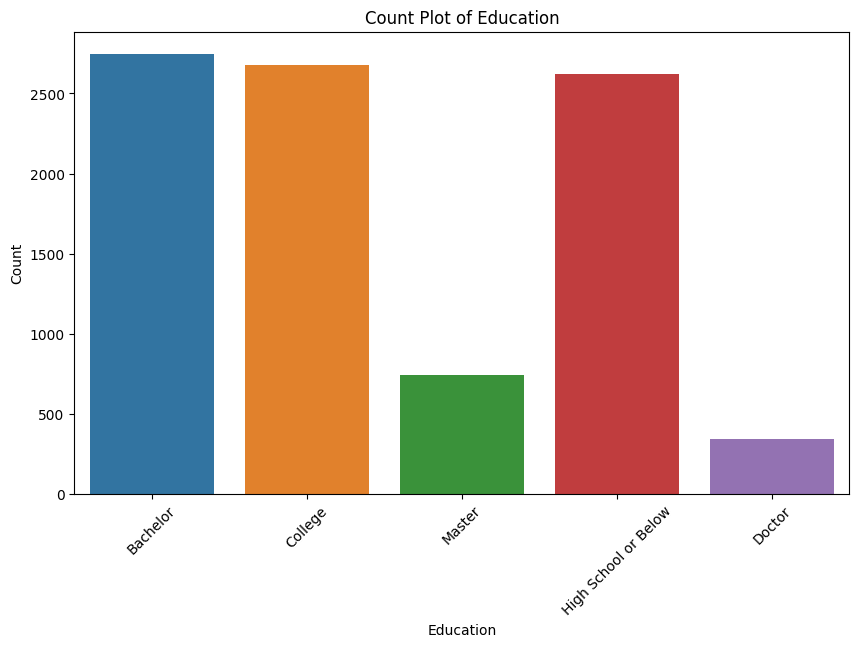

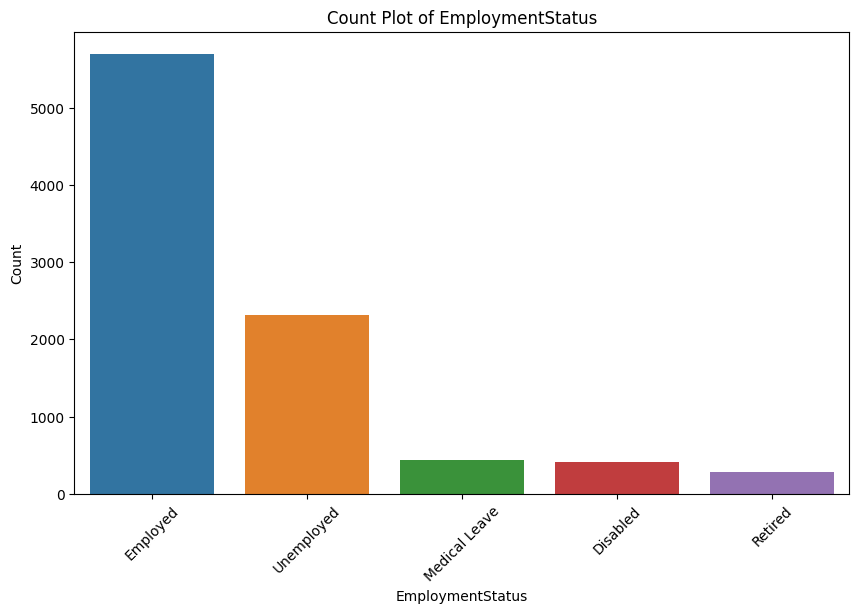

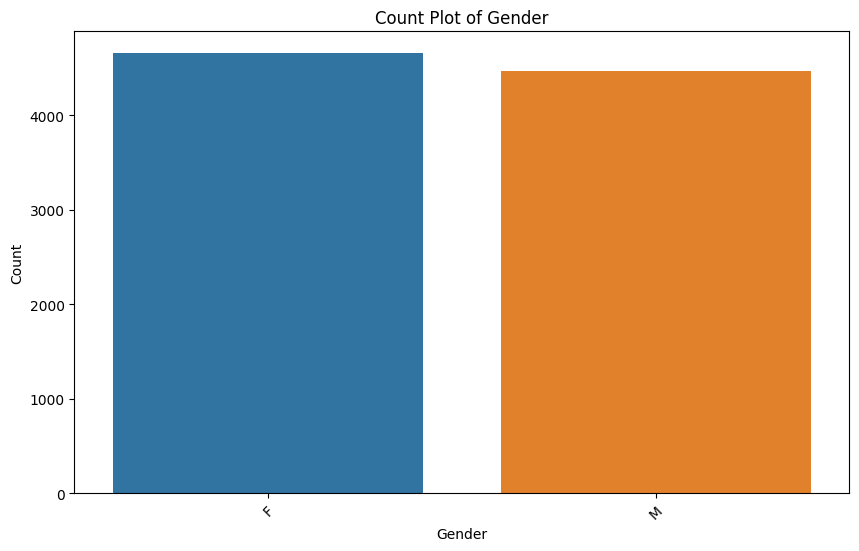

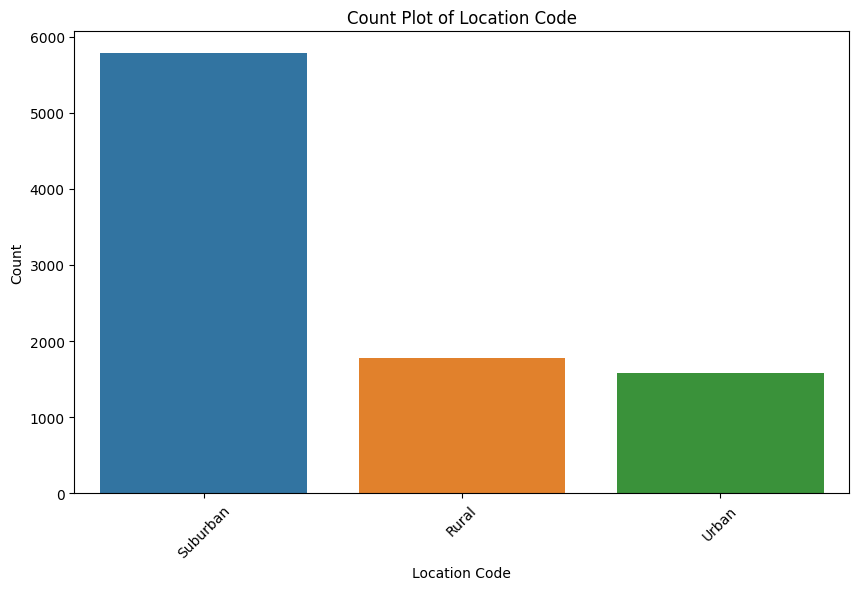

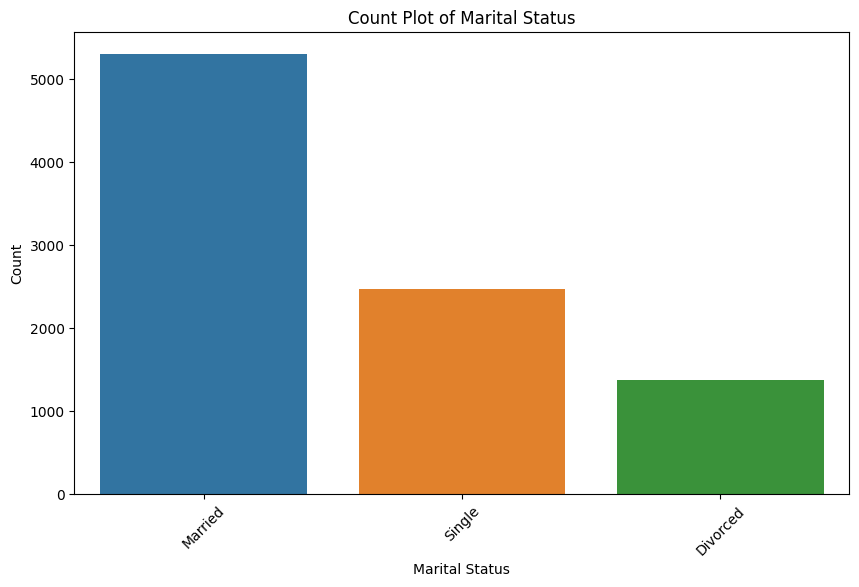

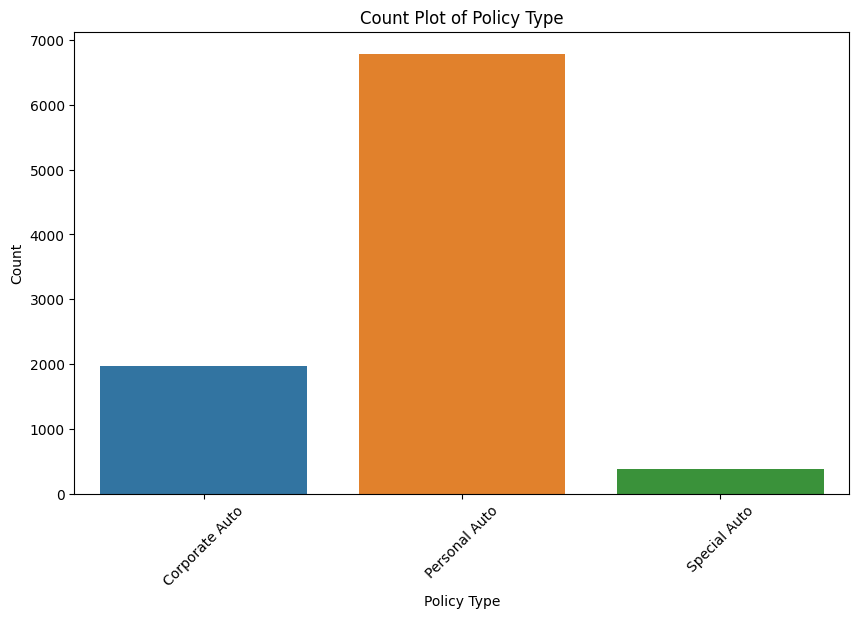

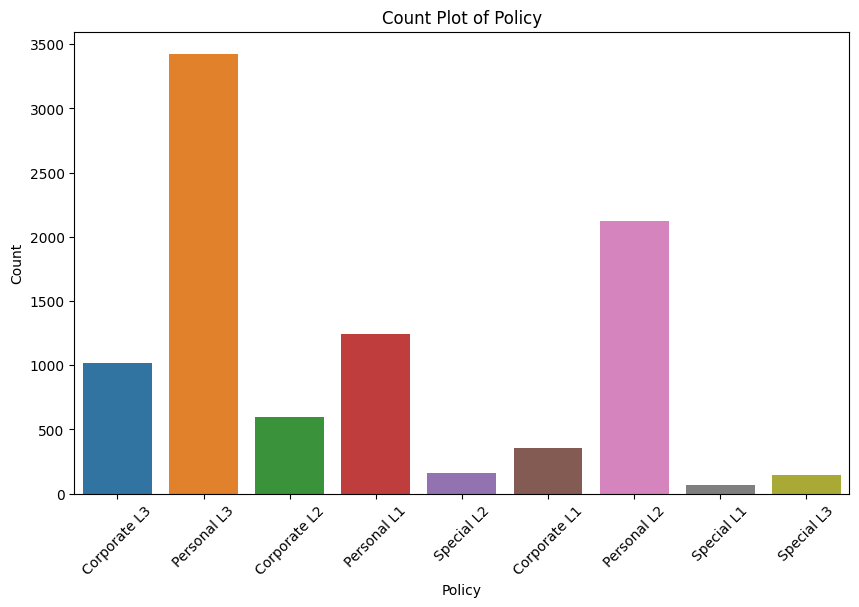

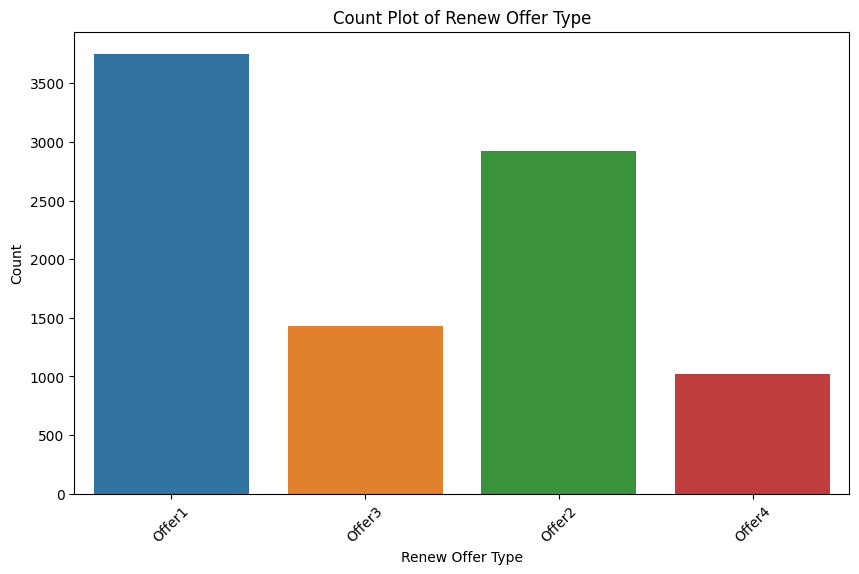

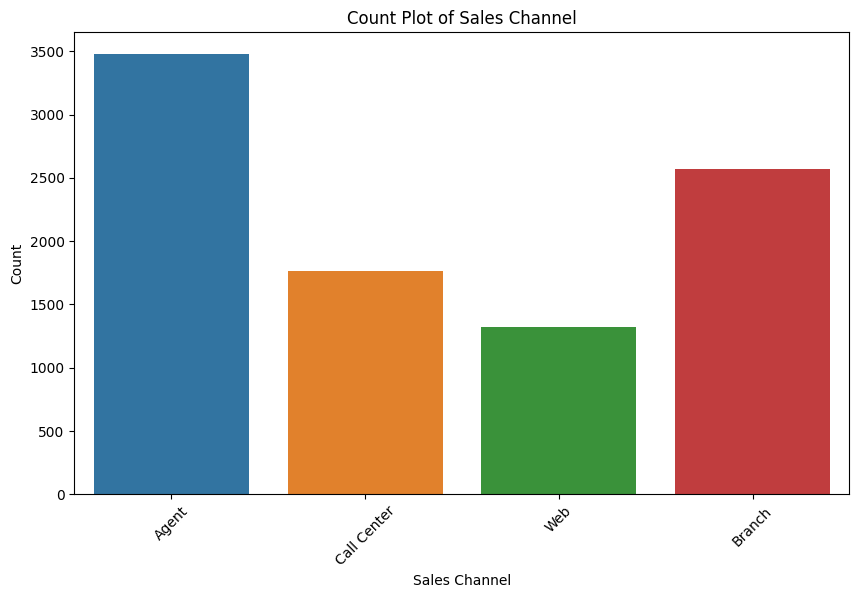

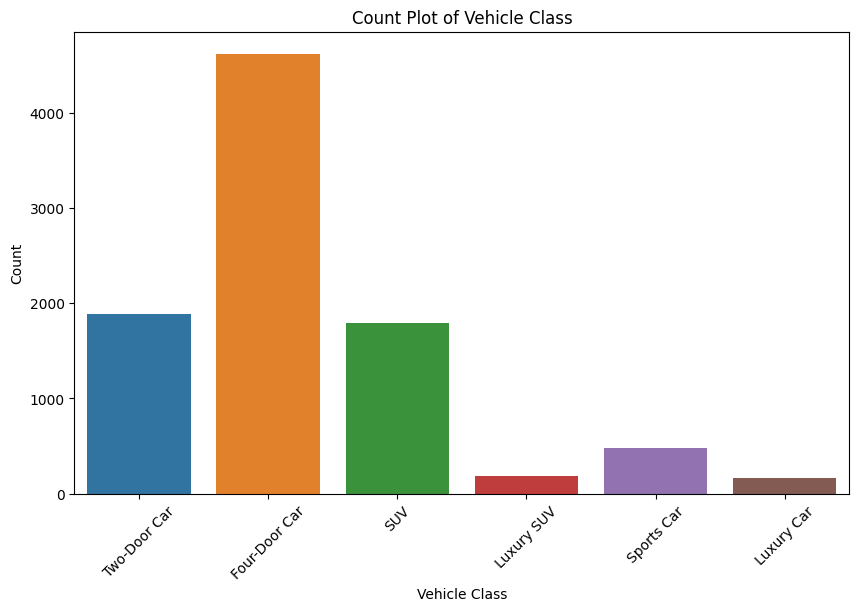

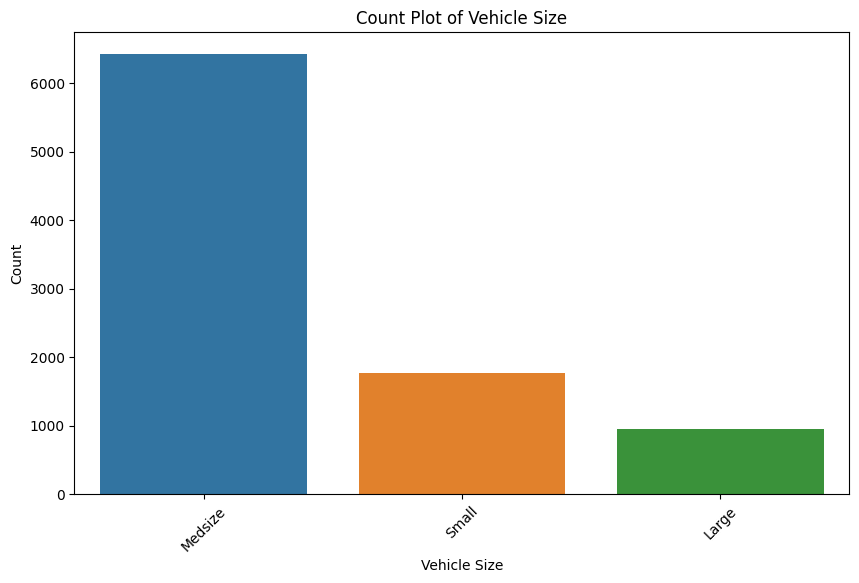

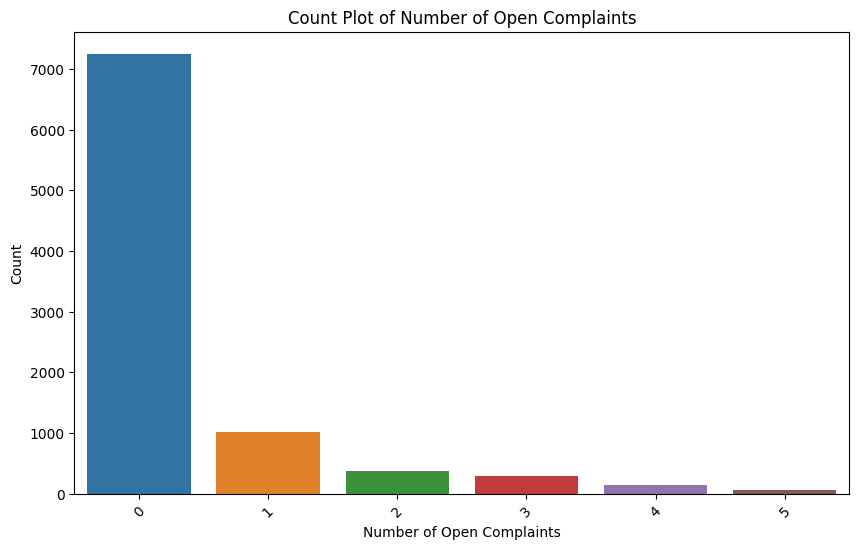

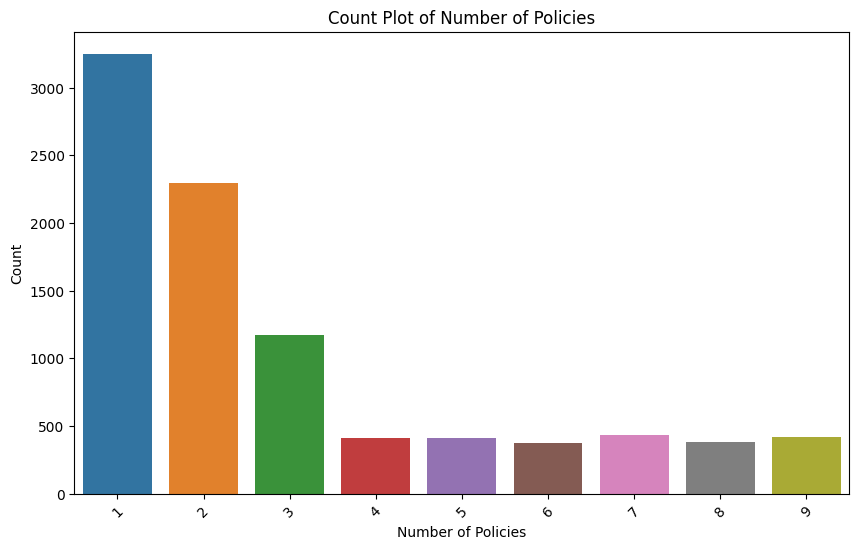

In [28]:
# Loop through each categorical column and plot count plot
for column in cat_cols:
    if column == 'Customer':
        print(f"Skipping plot for {column} column as it's a categorical variable with too many unique values")
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[column])
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.show()

In [29]:
# Check for number of customers employed
df["EmploymentStatus"].value_counts(normalize=True)*100

EmploymentStatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: proportion, dtype: float64

Around 62.38% of the customers are employed

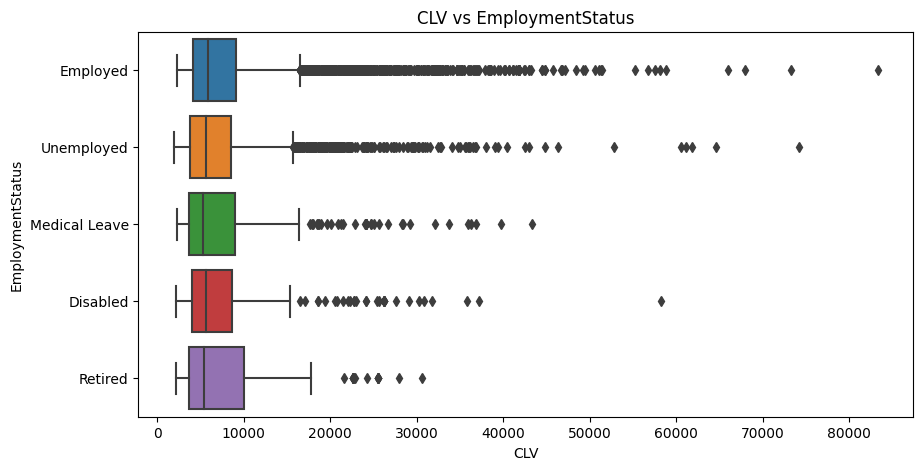

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['EmploymentStatus'],x=df['CLV'])
plt.title("CLV vs EmploymentStatus")
#plt.xticks(rotation=45)
# plt.savefig("bemp1.png")
plt.show()

In [31]:
df['Effective To Date']

0         2/24/11
1         1/31/11
2         2/19/11
3         1/20/11
4        3/2/2011
          ...    
9129    10/2/2011
9130    12/2/2011
9131     6/2/2011
9132     3/2/2011
9133      2/14/11
Name: Effective To Date, Length: 9134, dtype: object

In [32]:
# change the dtype of cols effective to data and months to date and month
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)
df["Months"] = df["Effective To Date"].dt.month

In [33]:
df['Months'] = df['Months'].astype('object')

In [34]:
df['Months']

0        2
1        1
2        2
3        1
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133     2
Name: Months, Length: 9134, dtype: object

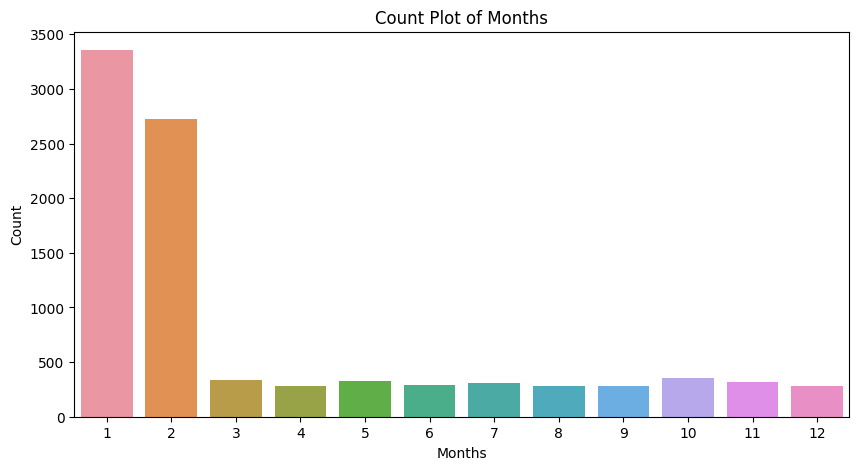

In [35]:
# plot the count plot for months
plt.figure(figsize=(10,5))
sns.countplot(x=df["Months"])
plt.title("Count Plot of Months")
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

In [36]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [37]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

### Heatmap

In [38]:
#Plot the Heatmap
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

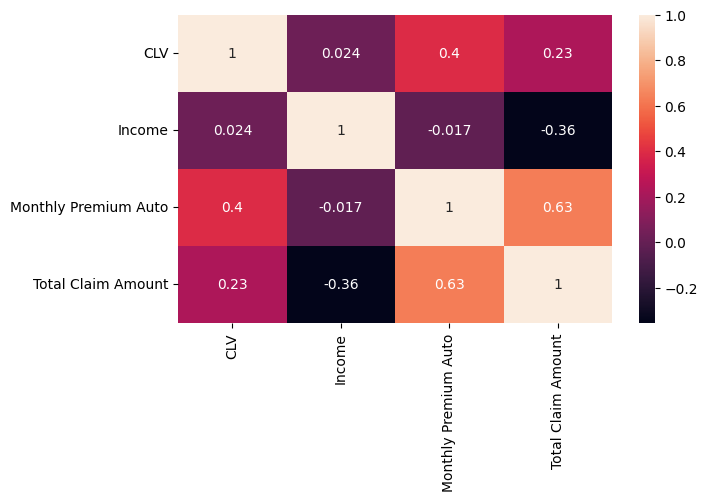

In [39]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

As we can see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.

### **8. Statistical Significance and feature engineering**

- **p-value > alpha (0.05): Fail to reject the null hypothesis (H0):** The data is normally distributed

- **p-value ≤ alpha (0.05): Reject the null hypothesis (HA):** The data is not normally distributed



In [40]:
stats.shapiro(df['CLV'])

ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

- p-value less than 0.05 we reject null hypothesis the data is not normally distributed

- We will proceed with non parametric tests since the dependent variable is not normally distributed

In [41]:
# Check the list of categorical features
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [42]:
# Perform non-paramertic tests
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


- **p-value > alpha (0.05): Fail to reject the null hypothesis (H0):** The distributions of both populations are equal

- **p-value ≤ alpha (0.05): Reject the null hypothesis (HA):** The distributions of both populations are not equal

- **Mean Rank:**
If the distributions are identical (under the null hypothesis), the mean ranks of the two groups should be approximately the same. The Mann-Whitney U test ranks all the observations from both groups together and then compares the sum of the ranks between the two groups.

In [43]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

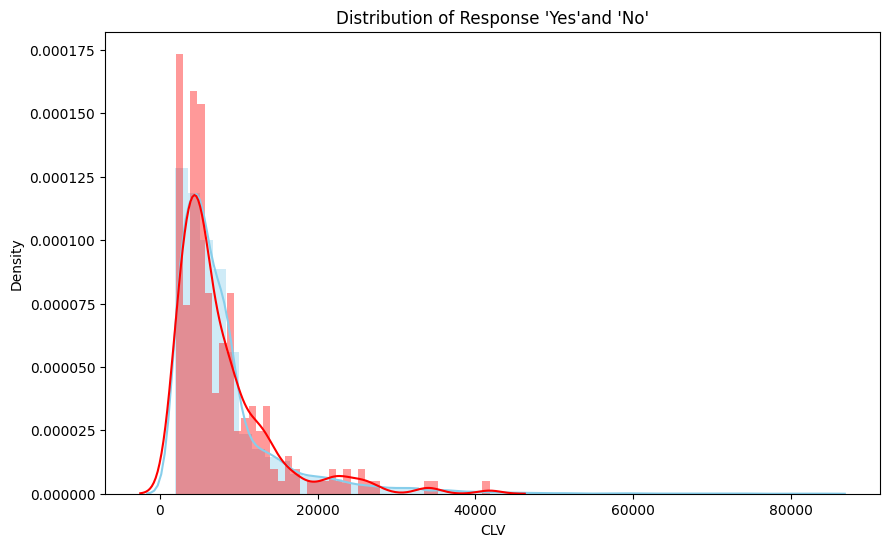

In [44]:
# Plot the distributions of both populations
plt.figure(figsize=(10,6))
sns.distplot(yes, kde=True, color='skyblue')
sns.distplot(no,kde=True,color='red')
plt.title("Distribution of Response 'Yes'and 'No'")
plt.show()

- **We Fail to reject the null hypothesis (H0):** The null hypothesis of the Mann-Whitney U test is that the distributions of the two groups are identical. This implies that the populations from which the samples are drawn have the same median.

In [45]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)



- **p-value is greater > 0.05 we failed to reject null hypothesis:** The mean rank will be the same for both yes and no.

In [46]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [47]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)



- **p-value is greater > 0.05 we failed to reject null hypothesis:** The mean rank will be the same for both male and female.

- We used non-parametric test to compare the distributions of the two features across different groups.

- The test results indicated that the differences in the distributions of these features are not statistically significant.

- This means that these features do not provide meaningful information to distinguish between the groups in relation to the target variable.

Test with mean rank for the states:
- **p-value > alpha (0.05): Fail to reject the null hypothesis (H0):** The mean ranks of the groups are the same.

- **p-value ≤ alpha (0.05): Reject the null hypothesis (HA):** The mean ranks of the groups are not the same.

In [48]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [49]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


**Kruskal-Wallis H-test:**
Purpose: The Kruskal-Wallis H-test is used to determine if there are statistically significant differences between the medians of three or more independent groups. And indeed specifically tests for differences in the mean ranks of the groups, not the means themselves. This makes it a non-parametric alternative to the one-way ANOVA, which assumes normal distribution of the data.



In [50]:
# Kruskal-Wallis H-test
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

In [51]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

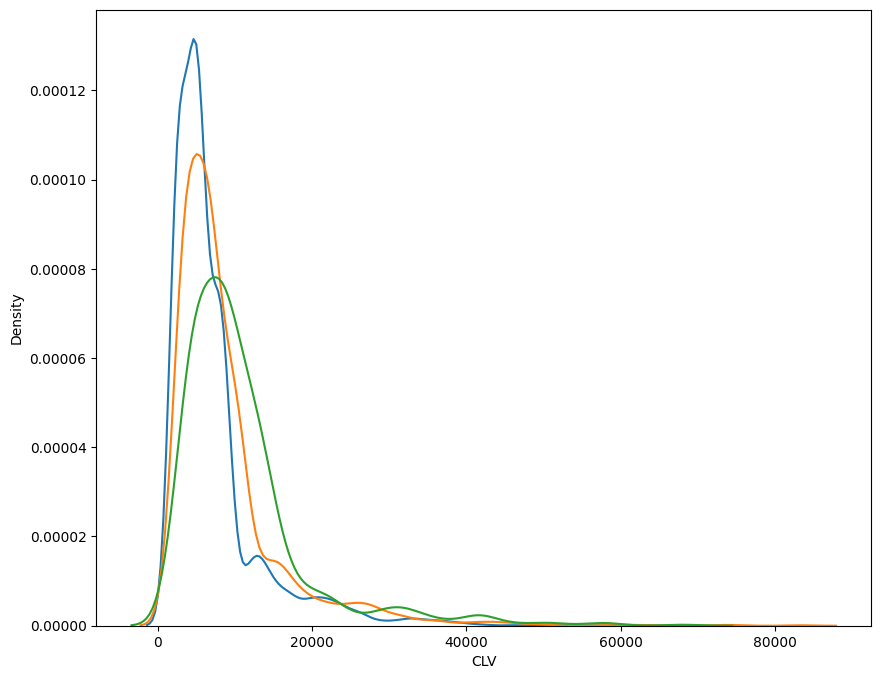

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)
plt.show()

In [53]:
# Anova test for Ba,Ex,Pr
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [54]:
# Kruskal-Wallis H-test
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


- Since, p-value > alpha (0.05): We fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

In [55]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [56]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


- Since p-value ≤ alpha (0.05), we reject the null hypothesis (HA): The mean ranks of the groups are not the same.

- The Education is significant for the prediction of CLV

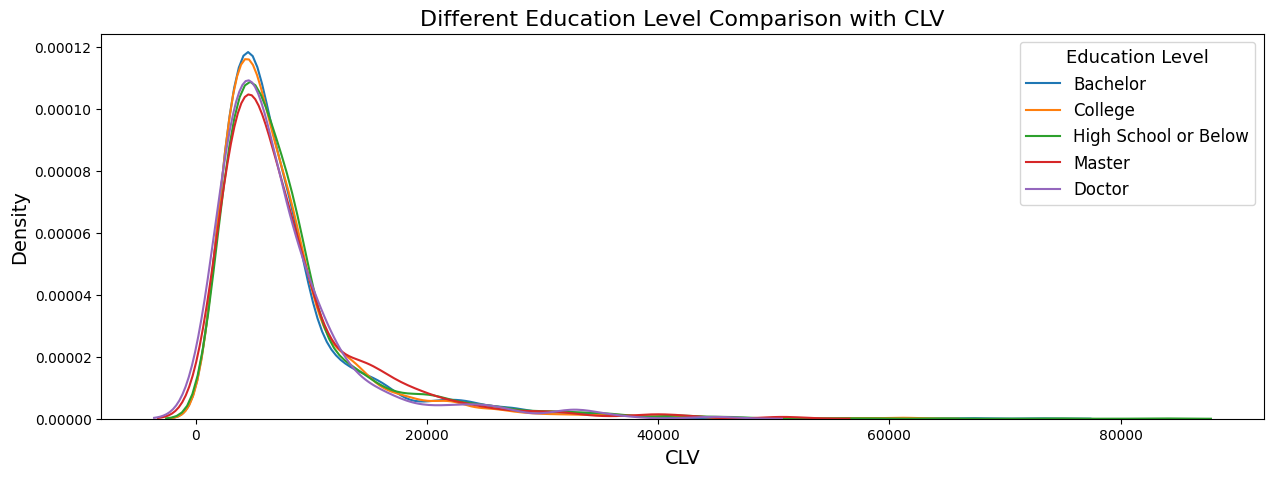

In [57]:
plt.figure(figsize=(15, 5))
sns.kdeplot(Ba, label='Bachelor')
sns.kdeplot(Co, label='College')
sns.kdeplot(Hi, label='High School or Below')
sns.kdeplot(Ma, label='Master')
sns.kdeplot(Da, label='Doctor')

plt.title("Different Education Level Comparison with CLV", fontsize=16)
plt.xlabel("CLV", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Education Level', fontsize=12, title_fontsize='13')
#plt.grid(True)
#plt.savefig("Education.png")
plt.show()

In [58]:
# Employment Status
Ba=df[df['EmploymentStatus']=='Employed']['CLV']
Co=df[df['EmploymentStatus']=='Unemployed']['CLV']
Hi=df[df['EmploymentStatus']=='Medical Leave']['CLV']
Ma=df[df['EmploymentStatus']=='Disabled']['CLV']
Da=df[df['EmploymentStatus']=='Retired']['CLV']

In [59]:
e=stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


- Since p-value ≤ alpha (0.05), we reject the null hypothesis (HA): The mean ranks of the groups are not the same.

- The EmploymentStatus is significant for the prediction of CLV

In [60]:
Ba=df[df['Location Code']=='Suburban']['CLV']
Co=df[df['Location Code']=='Rural']['CLV']
Hi=df[df['Location Code']=='Urban']['CLV']

In [61]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

- The Location Code is not significant for the prediction of CLV

In [62]:
Ba=df[df['Marital Status']=='Married']['CLV']
Co=df[df['Marital Status']=='Single']['CLV']
Hi=df[df['Marital Status']=='Divorced']['CLV']

In [63]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

- The Marital Status is not significant for the prediction of CLV

In [64]:
Ba=df[df['Number of Open Complaints']==0]['CLV']
Co=df[df['Number of Open Complaints']==1]['CLV']
Hi=df[df['Number of Open Complaints']==2]['CLV']
Ma=df[df['Number of Open Complaints']==3]['CLV']
Da=df[df['Number of Open Complaints']==4]['CLV']
As=df[df['Number of Open Complaints']==5]['CLV']

In [65]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

- The Number of Open Complaints is not significant for the prediction of CLV

In [66]:
Ba=df[df['Number of Policies']==1]['CLV']
Co=df[df['Number of Policies']==2]['CLV']
Hi=df[df['Number of Policies']==3]['CLV']

In [67]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


- Since p-value ≤ alpha (0.05), we reject the null hypothesis (HA): The mean ranks of the groups are not the same.

- The Number of Policies is significant for the prediction of CLV

In [68]:
Ba=df[df['Policy Type']=='Personal Auto']['CLV']
Co=df[df['Policy Type']=='Corporate Auto']['CLV']
Hi=df[df['Policy Type']=='Special Auto']['CLV']

In [69]:
i= stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0)

- The Policy Type is not significant for the prediction of CLV

In [70]:
Ba=df[df['Policy']=='Personal L3']['CLV']
Co=df[df['Policy']=='Personal L2']['CLV']
Hi=df[df['Policy']=='Personal L1']['CLV']
Ma=df[df['Policy']=='Corporate L3']['CLV']
Da=df[df['Policy']=='Corporate L2']['CLV']
Ca=df[df['Policy']=='Corporate L1']['CLV']
s1=df[df['Policy']=='Special L2']['CLV']
s2=df[df['Policy']=='Special L3']['CLV']
s3=df[df['Policy']=='Special L1']['CLV']

In [71]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0):

- The Policy is not significant for the prediction of CLV

In [72]:
Ba=df[df['Renew Offer Type']=='Offer1']['CLV']
Co=df[df['Renew Offer Type']=='Offer2']['CLV']
Hi=df[df['Renew Offer Type']=='Offer3']['CLV']
Ma=df[df['Renew Offer Type']=='Offer4']['CLV']

In [73]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

- The Renew Offer Type is not significant for the prediction of CLV

In [74]:
Ba=df[df['Sales Channel']=='Agent']['CLV']
Co=df[df['Sales Channel']=='Branch']['CLV']
Hi=df[df['Sales Channel']=='Call Center']['CLV']
Ma=df[df['Sales Channel']=='Web']['CLV']

In [75]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

- The Sales Channel is not significant for the prediction of CLV

In [76]:
Ba=df[df['Vehicle Class']=='Four-Door Car']['CLV']
Co=df[df['Vehicle Class']=='Two-Door Car']['CLV']
Hi=df[df['Vehicle Class']=='SUV']['CLV']
Ma=df[df['Vehicle Class']=='Sports Car']['CLV']
Da=df[df['Vehicle Class']=='Luxury SUV']['CLV']
Ca=df[df['Vehicle Class']=='Luxury Car']['CLV']

In [77]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


In [78]:
m=stats.f_oneway(Ba,Co,Hi,Ma,Da,Ca)
print(m)

F_onewayResult(statistic=267.15811680243496, pvalue=2.085525760212929e-267)


- p-value > alpha (0.05): Fail to reject the null hypothesis (H0): The mean ranks of the groups are the same.

- The Vehicle Class is not significant for the prediction of CLV

In [79]:
Ba=df[df['Vehicle Size']=='Medsize']['CLV']
Co=df[df['Vehicle Size']=='Small']['CLV']
Hi=df[df['Vehicle Size']=='Large']['CLV']

In [80]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


- Since p-value ≤ alpha (0.05), we reject the null hypothesis (HA): The mean ranks of the groups are not the same.

- The Vehicle Size is significant for the prediction of CLV

In [81]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [82]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [83]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [84]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]


In [85]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 2.085525760212929e-267,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [86]:
len(p_values)

16

In [87]:
len(cat_cols.columns)

16

In [88]:
pd.DataFrame(p_values,index=(cat_cols.columns), columns=['P_value'])

,P_value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


- Coverage, Education, EmploymentStatus, Marital Status, Renew Offer Type, Vehicle class, Vehicle class, Number of open complaints and No of Policies play a significant role in predicting the CLV

### **9. Data preprocessing**

In [89]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [90]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [92]:
# One-hot encoding for categorical columns
catg=pd.get_dummies(cat_cols,drop_first=True)

In [93]:
catg = catg.astype(int)

print(catg)


      Number of Open Complaints  Number of Policies  State_California  \
0                             0                   1                 0   
1                             0                   8                 0   
2                             0                   2                 0   
3                             0                   7                 1   
4                             0                   1                 0   
...                         ...                 ...               ...   
9129                          0                   2                 1   
9130                          0                   1                 1   
9131                          3                   2                 1   
9132                          0                   3                 1   
9133                          0                   1                 1   

      State_Nevada  State_Oregon  State_Washington  Response_Yes  \
0                0             0                 1     

In [94]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [95]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ordinary least Squares(OLS) Model

In [96]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [97]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          6.92e-323
Time:                        09:25:04   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

### Assumptions
1. No autocorrelation
2. Linearity of residuals
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

**Assumption 1 No Autocorrelation**

Test needed : Durbin- Watson Test.

- It's value ranges from 0-4. 

- If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.

- If the value ranges from 2-4, it is known as Negative autocorrelation.

- If the value is exactly 2, it means No Autocorrelation.

- For a good linear model, it should have low or no autocorrelation

In [99]:
dw_statistic = durbin_watson(lin_reg.resid)

In [100]:
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.9954364418691977


- We can see here the values of dublin watson test: 1.995 **(NO AUTO-CORRELATION)**

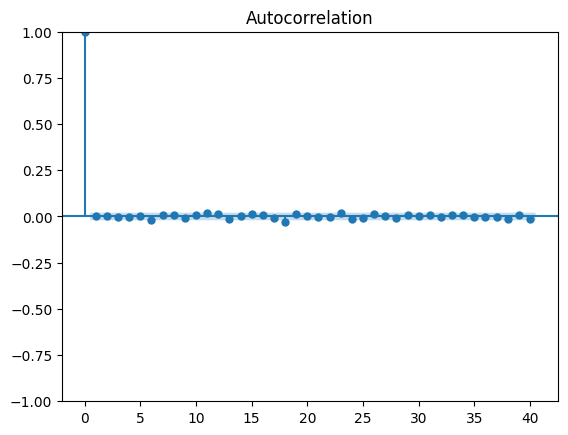

In [102]:
# Plot the autocorrelation graph
acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

Asssumption 3 - Linearity of residuals

Here we have 2 options. 

- Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR
- We can go for rainbow test. 

Let's look both of them one by one.

- H0: Fail to reject the null hypothesis, residuals are normally distributed.
- HA: Reject the null hypothesis, residuals are not normally distributed


In [108]:
# rainbow test
rainbow_statistic=sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model
print(f'Rainbow test statistic:{rainbow_statistic}')

Rainbow test statistic:(1.0164972729968935, 0.2907128743692436)


The data is linear, pvalue > 0.05 failed to reject null hypothesis H0, so residuals are normally distributed

In [109]:
lin_reg.resid.mean()

1.6765004398722552e-09

**Assumption 3 Normality of Error Terms**

Test needed : Jarque Bera

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

- For a good model, the residuals should be normally distributed. 

- The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. 

- We generally prefer a lower value of jarque bera test.

In [104]:
jarque_statistic=stats.jarque_bera(lin_reg.resid)

print(f'Jarque-Bera statistic: {jarque_statistic}')


Jarque-Bera statistic: SignificanceResult(statistic=65051.54524138217, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected. In this case the computed value of the JB statistic 65051.11 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed

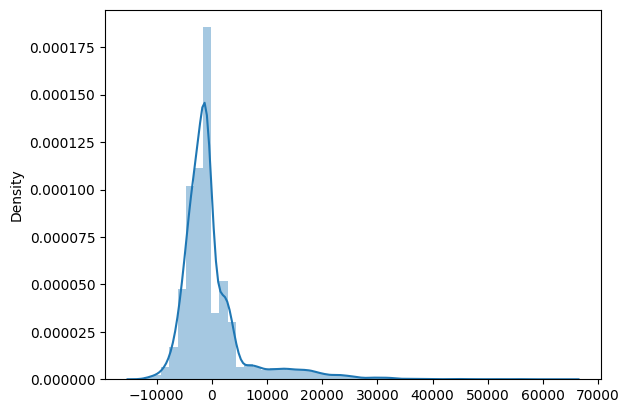

In [107]:
# plot the ols model linear regression distribution
sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

**Assumption 4 No Heteroscedasticity --> Homoscedasticity**

- Homoscedacity: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

- Heteroscedacity: If the variance of the residuals varies across the regression line, then the data is said to be heteroscedastic.

- **Test needed:** goldfeld test OR Beusch-Wagon Test

- The Goldfeld-Quandt test is a test for heteroscedasticity in a regression model. The test compares the sum of squared residuals from the fitted model with the sum of squared residuals from a model with homoscedastic errors.

- The Beusch-Wagon test is a test for heteroscedasticity in a regression model. It is a modification of the Goldfeld-Quandt test and is based on the Breusch-Pagan LM test.

- For a good model, the residuals should be homoscedastic.




In [111]:
# Goldfeld test
goldfeld_statistic=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

print(f'Goldfeld-Quandt statistic: {goldfeld_statistic}')

Goldfeld-Quandt statistic: (1.2289680194898227, 2.216740369946362e-12, 'increasing')


p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

Assumption 5- No Multi-Collinearity 

- Multicollinearity occurs when independent variables in a regression model are highly correlated.

- **Test needed:** Variance Inflation Factor (VIF)

- The Variance Inflation Factor (VIF) measures the amount of multicollinearity in the regression model.

- A rule of thumb for interpreting VIF values is:

- 1 < VIF < 5: a moderate amount of collinearity is present.

- VIF > 5: severe multicollinearity is present.

- The interpretation of VIF: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [118]:
# VIF test
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Total Claim Amount,4.396905
Number of Open Complaints,1.009196
Number of Policies,1.019460
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


- As we can see that there is high VIF in column Policy & policy type.

- Also we have seen in statistical approach these veriables are not significant to predict target hence from above 2 conclusion we can remove them

In [121]:
# Split train, test sets
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)

y=dfn['CLV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [123]:
X_train.shape

(6393, 42)

In [124]:
y_train.shape

(6393,)

In [125]:
X_test.shape

(2741, 42)

In [126]:
y_test.shape

(2741,)

### **10. Model Building and Evaluation**

#### **Linear regression**

In [127]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.17164435227924835
R^2 score for test: 0.15409086324640797


In [129]:
# Linear regression prediction
y_pred = model.predict(X_test)

In [130]:
y_pred

array([ 9535.29506408,  5685.41857212,  7156.3028139 , ...,
       11019.31101816,  6205.36566328, 10794.4203512 ])

In [131]:
# Linear regression model evaluation
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 6634.79696234323
MAE 4027.421627336982
R-squared: 0.15409086324640797


**Recursive Backward Elimination**

This method is used to identify and retain the most significant features in a dataset by iteratively removing the least significant ones.

Why Use Recursive Backward Elimination?
- Improve Model Performance: By removing irrelevant or less significant features, the model can focus on the most important ones, potentially improving its performance.

- Reduce Overfitting: Fewer features can help reduce the risk of overfitting, where the model performs well on training data but poorly on unseen data.

- Simplify the Model: A simpler model with fewer features is easier to interpret and understand.

In [132]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']


In [134]:
X_new = X[['Monthly Premium Auto',
           'Number of Open Complaints',
           'Number of Policies',
           'Education_High School or Below',
           'EmploymentStatus_Employed',
           'Marital Status_Single',
           'Policy_Corporate L2',
           'Renew Offer Type_Offer2', 
           'Renew Offer Type_Offer3',
           'Renew Offer Type_Offer4',
           'Vehicle Class_SUV',
           'Vehicle Class_Sports Car']]

In [136]:
# apply OLS reggression model
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     152.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:49:35   Log-Likelihood:                -92825.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9121   BIC:                         1.858e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            950.9750    258.297      3.682      0.000     444.654    1457.296
Monthly Premium Auto              74.8680      2.153     34.778      0.000      70.648      79.088
Number of Open Complaints       -264.7817     72.329     -3.661      0.000    -406.562    -123.001
Number of Policies                57.8308     27.624      2.093      0.036       3.682     111.980
Education_High School or Below   348.1874    146.045      2.384      0.017      61.906     634.469
EmploymentStatus_Employed        705.4200    145.051      4.863      0.000     421.087     989.753
Marital Status_Single           -376.0680    155.906     -2.412      0.016    -681.678     -70.458
Policy_Corporate L2             -604.4051    266.356     -2.269      0.023   -1126.523     -82.287
Renew Offer Type_Offer2         -980.9505    159.665     -6.144      0.000   -1293.930    -667.970
Renew Offer Type_Offer3         -497.2431    196.727     -2.528      0.012    -882.872    -111.614
Renew Offer Type_Offer4        -1145.4745    226.146     -5.065      0.000   -1588.772    -702.177
Vehicle Class_SUV                466.9231    184.095      2.536      0.011     106.056     827.790
Vehicle Class_Sports Car         656.8573    306.441      2.144      0.032      56.164    1257.551
==============================================================================
Omnibus:                     5681.817   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65559.400
Skew:                           2.858   Prob(JB):                         0.00
Kurtosis:                      14.815   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Rigde and Lasso Regression**

In [148]:
# Normalization and model fitting
ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
ridge.fit(X_train, y_train)
print('Ridge Regression')

# ridge and Lasso regression prediction
y_pred = ridge.predict(X_test)

# Model evaluation for ridge regression
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 6634.7872136270325
R-squared: 0.15409334908646954


In [144]:
y_pred

array([ 9535.41033501,  5685.28661656,  7156.08851699, ...,
       11019.16764921,  6205.1775515 , 10794.54772651])

In [149]:
# Normalization and model fitting- alpha 0.1
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge.fit(X_train, y_train)
print('Ridge Regression')

# ridge and Lasso regression prediction
y_pred = ridge.predict(X_test)

# Model evaluation for ridge regression
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 6634.700711580686
R-squared: 0.15411540621564823


In [151]:
# lasso regression model prediction and evaluation
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 6631.949419417875
R-squared: 0.1548168072930436


#### **Decision Tree**

In [156]:
# Model fitting
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)

# decision tree prediction
y_pred=dt.predict(X_test)

# Model evaluation for decision tree
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 5126.015748921743
MAE 1681.205475413353
R-squared: 0.4950733261457262


In [157]:
# Feature selection for x and y
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [158]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1961521558772452
MAE 0.08885672071039409
R-squared: 0.9139531744119158


#### **Hyperparameter tuning for Random Forest**

In [159]:
# RandomForest hyperparameter tuning
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [161]:
# Use the tuned hyperparameter and fit the model
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

# prediction
y_pred=rf.predict(X_test)

# Model evaluation for random forest
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2289734824913351
MAE 0.12012126204135967
R-squared: 0.8827483236702032


#### **Adaboost Regression**

In [163]:
# fit the model
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='squared_error'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [164]:
# Predict on the test set
y_pred = adaboost.predict(X_test)

# Print results
print('AdaBoost with RandomForestRegressor')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

AdaBoost with RandomForestRegressor
RMSE: 0.21877313168228074
R-squared: 0.8929623294728375


In [165]:
# Create a DataFrame to display the feature importances from the RandomForest model
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]


,Score
Number of Policies,0.533529
Monthly Premium Auto,0.129633
Total Claim Amount,0.061131
Months Since Policy Inception,0.029283
Months Since Last Claim,0.026352
Income,0.025876
Vehicle Class_SUV,0.021471
Vehicle Class_Luxury SUV,0.011260
Vehicle Class_Luxury Car,0.010993
Coverage_Extended,0.010804


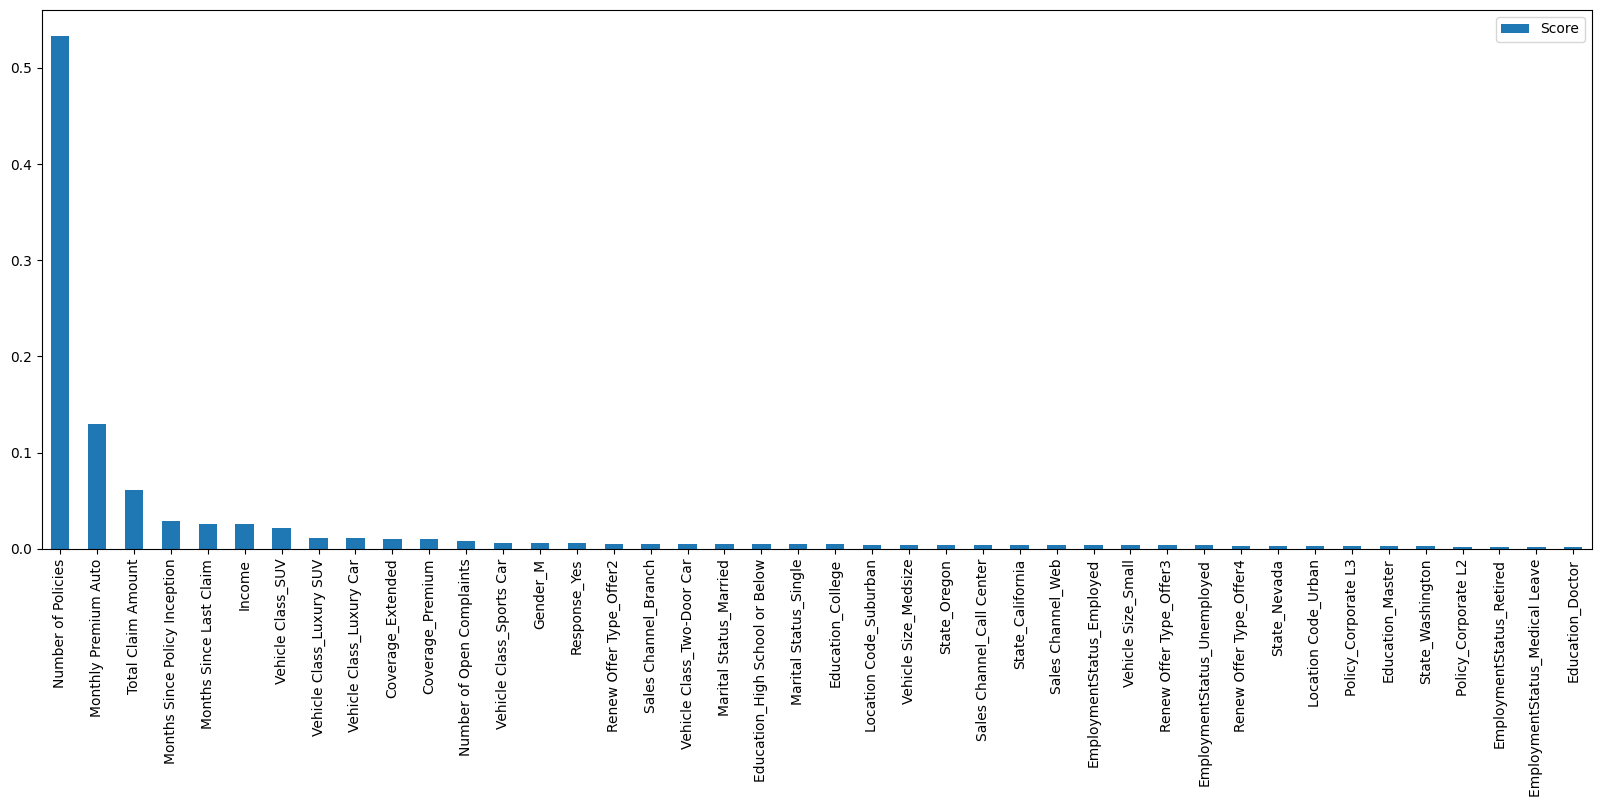

In [166]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()


### **11. Conclusion**

In predicting the Customer Lifetime Value (CLV) for an auto insurance company, this comprehensive analysis involved various regression techniques, including multiple linear regression, Ridge regression, Lasso regression, decision trees, random forests, hyperparameter tuning, and AdaBoost regression.

-  The goal was to identify the most influential features contributing to Customer Lifetime Value (CLV).

- The dataset used for this analysis consisted of 13,333 customer records, covering various demographic, policy, and insurance details. The data was preprocessed to handle missing values, outliers, and categorical variables.

- After feature selection by performing multiple statistical analysis, the best-performing regression model was identified as the Random Forest model with hyperparameter tuning using GridSearchCV. The model achieved an impressive accuracy of 0.88, indicating a high level of predictive accuracy.

- The Random Forest model also provided valuable insights into the feature importances. The most influential features contributing to CLV were Number of Policies and Monthly Premium. This suggests that customers with more policies and higher monthly premiums tend to have higher lifetime values. These insights can be leveraged to tailor marketing strategies, optimize customer retention efforts, and enhance overall business profitability.

By focusing on these key features, the company can better understand customer behavior and make data-driven decisions to maximize CLV.